|--- Outlook_Overcast <= 0.50
|   |--- Humidity_Normal <= 0.50
|   |   |--- Outlook_Rain <= 0.50
|   |   |   |--- class: 0
|   |   |--- Outlook_Rain >  0.50
|   |   |   |--- Wind_Strong <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Wind_Strong >  0.50
|   |   |   |   |--- class: 0
|   |--- Humidity_Normal >  0.50
|   |   |--- Wind_Weak <= 0.50
|   |   |   |--- Temperature_Cool <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Temperature_Cool >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Wind_Weak >  0.50
|   |   |   |--- class: 1
|--- Outlook_Overcast >  0.50
|   |--- class: 1



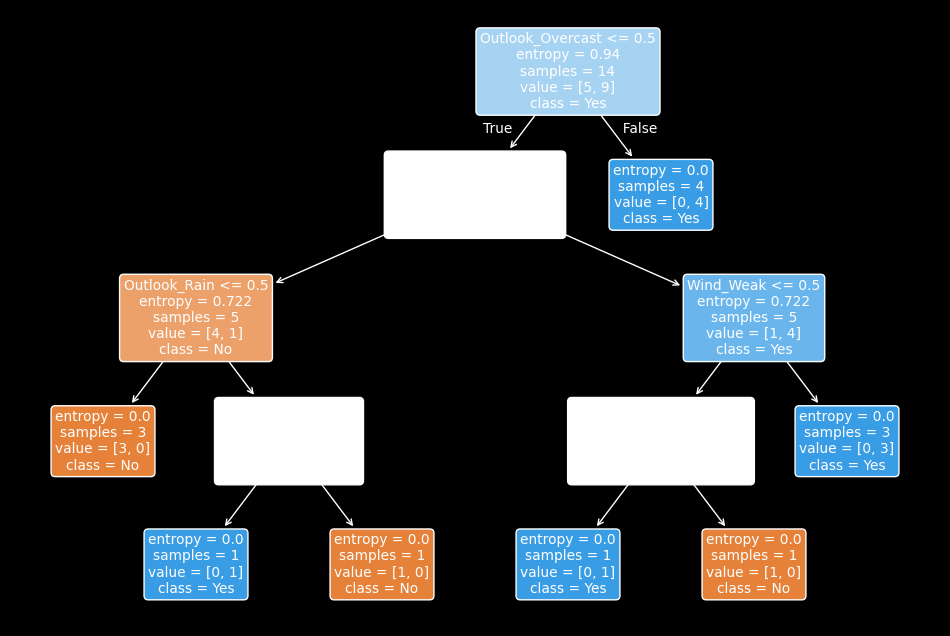

Feature importances:
 Outlook_Overcast    0.240353
Humidity_Normal     0.211237
Wind_Strong         0.151929
Temperature_Cool    0.151929
Outlook_Rain        0.122276
Wind_Weak           0.122276
Temperature_Mild    0.000000
Temperature_Hot     0.000000
Outlook_Sunny       0.000000
Humidity_High       0.000000
dtype: float64


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# 1) Create the dataset
data = [
    ["Sunny","Hot","High","Weak","No"],
    ["Sunny","Hot","High","Strong","No"],
    ["Overcast","Hot","High","Weak","Yes"],
    ["Rain","Mild","High","Weak","Yes"],
    ["Rain","Cool","Normal","Weak","Yes"],
    ["Rain","Cool","Normal","Strong","No"],
    ["Overcast","Cool","Normal","Strong","Yes"],
    ["Sunny","Mild","High","Weak","No"],
    ["Sunny","Cool","Normal","Weak","Yes"],
    ["Rain","Mild","Normal","Weak","Yes"],
    ["Sunny","Mild","Normal","Strong","Yes"],
    ["Overcast","Mild","High","Strong","Yes"],
    ["Overcast","Hot","Normal","Weak","Yes"],
    ["Rain","Mild","High","Strong","No"]
]
df = pd.DataFrame(data, columns=["Outlook","Temperature","Humidity","Wind","Play"])

# 2) Prepare features (one-hot encode categorical features)
X = pd.get_dummies(df[["Outlook","Temperature","Humidity","Wind"]])
y = df["Play"].map({"No":0, "Yes":1})  # 0/1 labels

# 3) Train Decision Tree using 'entropy' to match Information Gain
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X, y)

# 4) Print textual tree (simple)
r = export_text(clf, feature_names=list(X.columns))
print(r)

# 5) Plot the tree (visual)
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=list(X.columns), class_names=["No","Yes"], filled=True, rounded=True)
plt.show()

# Optionally inspect feature importances
fi = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importances:\n", fi)